# **23.01.25 std and synchronize**
r의 변화의 

In [2]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import numpy as np

from tqdm.notebook import tqdm
import pandas as pd

from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.To_Draw import Draw_theoretical as DDD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel_sim as Hpsim
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from TO_sim.Utility import *
import parmap

In [3]:
DF = 'Review/23.01.25 std and synchronize/'
Create_Folder(DF)

In [36]:
N = 500
dist = 'Lorentzian'
t_end = 200
ss = 14
N = 500
dK = 0.2
dt = 0.1
m = 6
applys = [1]
save = True
ms = [6]
# Draw_ = DD(m=m,dist = 'Normal')
df_sets = {}
rdf_sets = {}

for i in np.arange(5):
    df,rdf = Hp(m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = i,Init_dtheta=False,Init_dtheta_seed=applys, seed=i)
    df_sets[i] = df
    rdf_sets[i] = rdf

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]

In [37]:
seeds = np.arange(5)

In [38]:
Draw_ = DD(m=m,dist='Lorentzian')

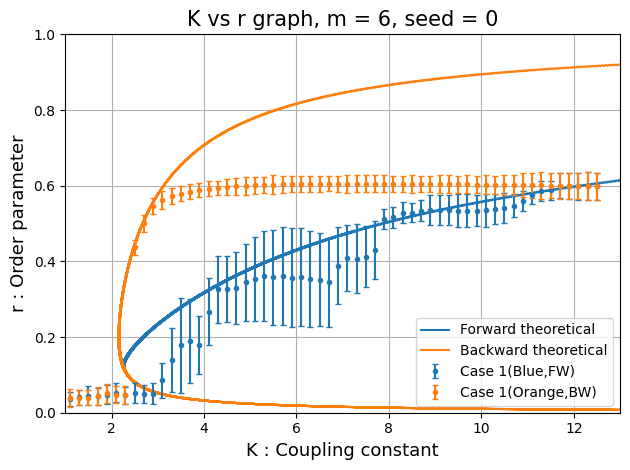

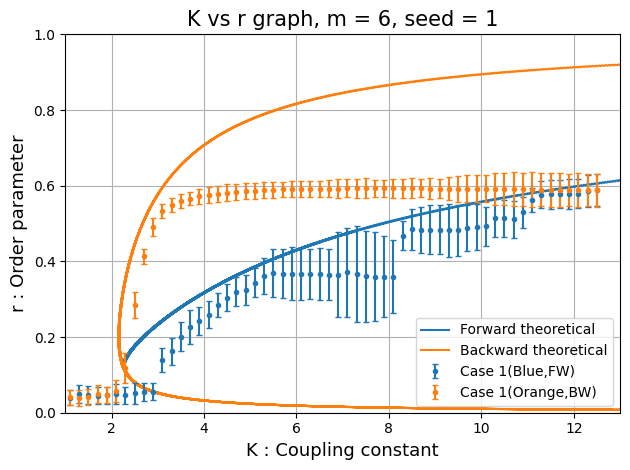

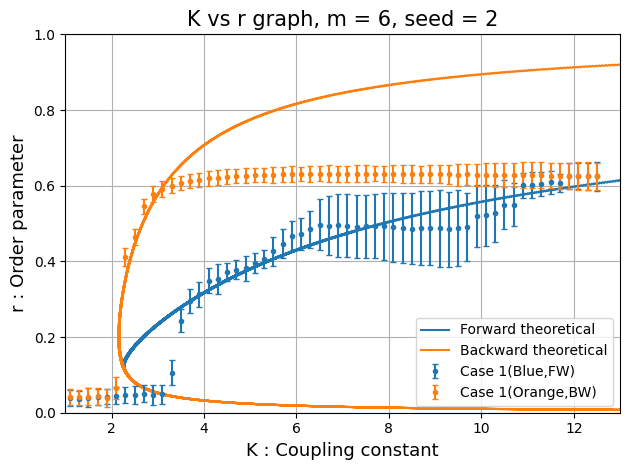

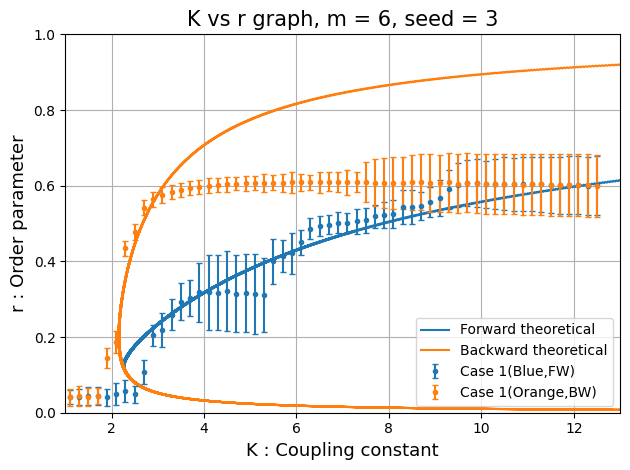

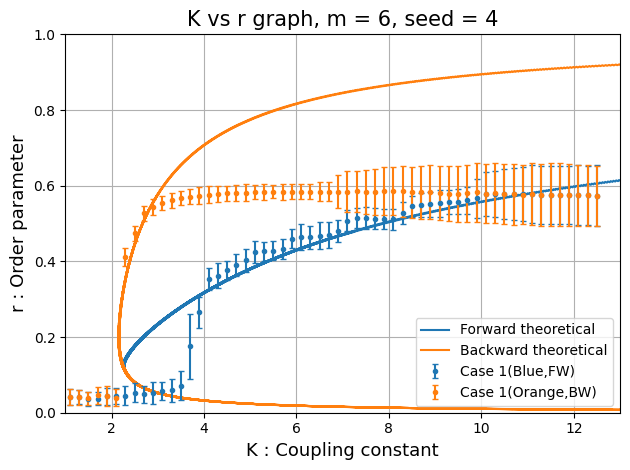

In [39]:
ST = 50
Ks = df.index
Ksr = rdf.index
Create_Folder(DF+f'seeds dist={dist}/')
for seed in seeds:
    df = df_sets[seed]
    rdf = rdf_sets[seed]
    plt.figure(facecolor='white')
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    
    Draw_.total()

    plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label='Case 1(Blue,FW)')
    plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label='Case 1(Orange,BW)')

    # plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
    # plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
    plt.legend()  
    plt.title(f'K vs r graph, m = {m}, seed = {seed}',fontsize= 15)
    plt.grid()

    plt.xlim(1,13)
    plt.ylim(0,1)

    plt.xlabel('K : Coupling constant',fontsize=13)
    plt.ylabel('r : Order parameter',fontsize=13)
    plt.tight_layout()
    plt.savefig(DF+f'seeds dist={dist}/seed={seed} m = {m}, K vs r graph.png',dpi=400)

In [40]:
def mean_wtime(x):
    temp = x[-200:,:]
    result = np.mean(temp,axis=0)
    return result

def omega_DP(df_sets,m,seed=1):
    df = df_sets[seed]
    Ks = df.index
    O_D,O_P = [],[]
    d_mean,d_min,d_max = [],[],[]
    p_mean,p_min,p_max = [],[],[]
    def mmm(temp,x):
        mean_,min_,max_ = np.mean(temp),np.min(x),np.max(x)
        return np.array([mean_,min_,max_])
    for K in Ks:
        x = df.loc[K].rs
        temp = x[-200:]
        omega_D = mmm(temp,x)*K
        omega_P = (4 / np.pi) * np.sqrt(omega_D / m)
        O_D.append(omega_D)
        O_P.append(omega_P)
    O_D,O_P = map(np.array,[O_D,O_P])
    return O_D,O_P


def omega_DP_(df_sets,m,seed=1):
    df = df_sets[seed]
    Ks = df.index
    O_D,O_P = [],[]
    d_mean,d_min,d_max = [],[],[]
    p_mean,p_min,p_max = [],[],[]
    def mmm(temp,x):
        mean_,min_,max_ = np.mean(temp),np.min(x),np.max(x)
        return np.array([mean_,min_,max_])
    for K in Ks:
        x = df.loc[K].rs
        temp = x[-200:]
        omega_D = np.mean(temp)*K
        omega_P = (4 / np.pi) * np.sqrt(omega_D / m)
        O_D.append(omega_D)
        O_P.append(omega_P)
    O_D,O_P = map(np.array,[O_D,O_P])
    return O_D,O_P
def make_mean_phase_vel(m):
    df = df_sets[m]
    rdf = rdf_sets[m]
    temp_df = df.dtheta_s.apply(mean_wtime)
    temp_rdf = rdf.dtheta_s.apply(mean_wtime)
    F_pv = np.array(temp_df.to_list())
    R_pv = np.array(temp_rdf.to_list())
    return F_pv,R_pv

C:\Users\kim9y\AppData\Local\Temp\ipykernel_33128\1408501405.py:41: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(211)


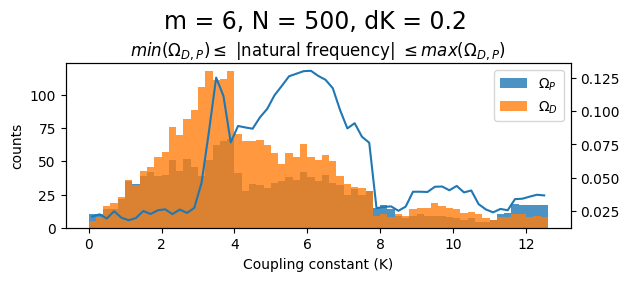

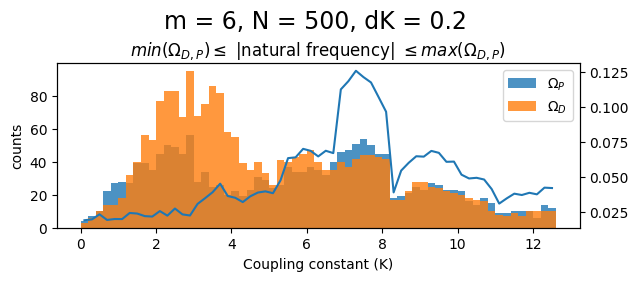

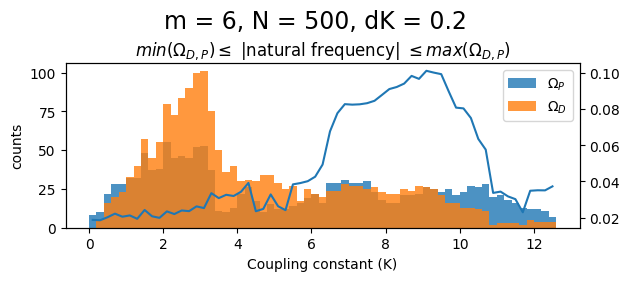

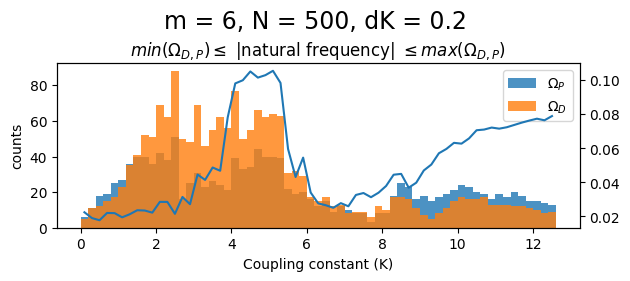

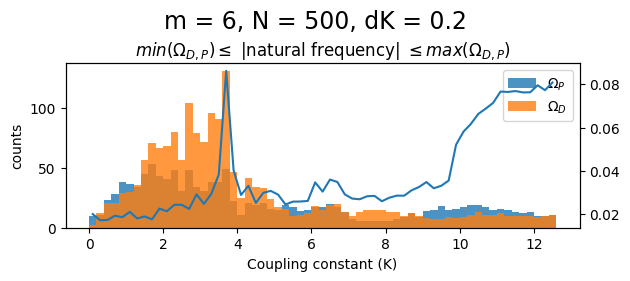

In [41]:
for seed in seeds:
    ODF,OPF = omega_DP(df_sets,m,seed)
    ODR,OPR = omega_DP(rdf_sets,m,seed)
    omega_ = df.iloc[0].Omega
    eff_omega_F,eff_omega_R = make_mean_phase_vel(seed)
    idx_ODF_eff_m = [np.where((-ODF[i,2]<=eff_omega_F[i])&(eff_omega_F[i]<=-ODF[i,0]))[0] for i in range(len(Ks))]
    idx_ODF_eff_p = [np.where((ODF[i,0]<=eff_omega_F[i])&(eff_omega_F[i]<=ODF[i,2]))[0] for i in range(len(Ks))]
    df = df_sets[seed]
    rdf = rdf_sets[seed]
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    
    size_ODF_eff_m = [len(i) for i in idx_ODF_eff_m]
    size_ODF_eff_p = [len(i) for i in idx_ODF_eff_p]
    idx_OPF_eff_m = [np.where((-OPF[i,2]<=eff_omega_F[i])&(eff_omega_F[i]<=-OPF[i,0]))[0] for i in range(len(Ks))] 
    idx_OPF_eff_p = [np.where((OPF[i,0]<=eff_omega_F[i])&(eff_omega_F[i]<=OPF[i,2]))[0] for i in range(len(Ks))] 
    size_OPF_eff_m = [len(i) for i in idx_OPF_eff_m]
    size_OPF_eff_p = [len(i) for i in idx_OPF_eff_p]


    idx_ODF_m = [np.where((-ODF[i,2]<=omega_)&(omega_<=-ODF[i,0]))[0] for i in range(len(Ks))]
    idx_ODF_p = [np.where((ODF[i,0]<=omega_)&(omega_<=ODF[i,2]))[0] for i in range(len(Ks))]

    size_ODF_m = [len(i) for i in idx_ODF_m]
    size_ODF_p = [len(i) for i in idx_ODF_p]
    idx_OPF_m = [np.where((-OPF[i,2]<=omega_)&(omega_<=-OPF[i,0]))[0] for i in range(len(Ks))] 
    idx_OPF_p = [np.where((OPF[i,0]<=omega_)&(omega_<=OPF[i,2]))[0] for i in range(len(Ks))] 
    size_OPF_m = [len(i) for i in idx_OPF_m]
    size_OPF_p = [len(i) for i in idx_OPF_p]


    size_ODF_eff_m,size_ODF_eff_p,size_OPF_eff_m,size_OPF_eff_p = map(np.array,[size_ODF_eff_m,size_ODF_eff_p,size_OPF_eff_m,size_OPF_eff_p])
    size_ODF_m,size_ODF_p,size_OPF_m,size_OPF_p = map(np.array,[size_ODF_m,size_ODF_p,size_OPF_m,size_OPF_p])
    plt.figure()
    
    # plt.bar(Ks,size_OPF_eff_m)
    plt.ylabel('counts')
    # plt.legend()
    ax = plt.subplot(211)
    plt.title(
        r'$min(\Omega_{D,P}) \leq$ |natural frequency| $\leq max(\Omega_{D,P})$')
    # plt.bar(Ks,size_ODF_m)
    plt.bar(Ks,size_OPF_p+size_OPF_m,dK,alpha=0.8,label =r'$\Omega_P$')
    # plt.bar(Ks,size_OPF_p,dK,alpha=0.8,label =r'$\Omega_P$')
    # plt.bar(Ks,size_OPF_m,dK,alpha=0.8,label =r'$\Omega_P$')

    plt.bar(Ks,size_ODF_p+size_ODF_m,dK,alpha=0.8,label =r'$\Omega_D$')
    # plt.bar(Ks,size_OPF_m)
    plt.legend()
    plt.ylabel('counts')
    plt.xlabel('Coupling constant (K)')
    ax2 = ax.twinx()  
    ax2.plot(Ks,data_std)
    
    plt.suptitle(f'm = {m}, N = {N}, dK = {dK}',fontsize=17,y = 0.95)
    plt.tight_layout()
    plt.savefig(DF+f'seeds dist={dist}/Check synchronization, seed={seed},m = {m}, N = {N}, dK = {dK}.png',dpi=400)